# Titanic Survival Prediction
from Kaggle,
referred code from: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31

lichkkkk@, Mar. 2020

In [335]:
import pandas as pd
import numpy as np

In [336]:
# Load data and print samples
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
# Have a basic taste of the data
## Total survival rate
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [338]:
## Sex ~ survival
data.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [339]:
## Average age to survive / die per Sex
data.groupby(['Survived', 'Sex'])['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

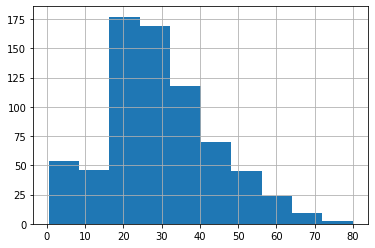

In [340]:
## Age distribution
data['Age'].hist()

In [341]:
# Data preprocessing
## Drop columns not going to be used
data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [342]:
## Convert enum values(Sex) to indicator variables
sex = pd.get_dummies(data['Sex'], drop_first=True)
data.drop(columns = ['Sex'], inplace=True)
data = pd.concat([data, sex], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [343]:
## Bucketize Age convert it to enum
binned_ages = pd.cut(data['Age'], 8)
age = pd.get_dummies(binned_ages, dummy_na=True, drop_first=True)
data.drop(columns = ['Age'], inplace=True)
data = pd.concat([data, age], axis=1)
data.head()

,Survived,Pclass,SibSp,Parch,Fare,male,"(10.368, 20.315]","(20.315, 30.263]","(30.263, 40.21]","(40.21, 50.158]","(50.158, 60.105]","(60.105, 70.052]","(70.052, 80.0]",NaN
0,0,3,1,0,7.2500,1,0,1,0,0,0,0,0,0
1,1,1,1,0,71.2833,0,0,0,1,0,0,0,0,0
2,1,3,0,0,7.9250,0,0,1,0,0,0,0,0,0
3,1,1,1,0,53.1000,0,0,0,1,0,0,0,0,0
4,0,3,0,0,8.0500,1,0,0,1,0,0,0,0,0


In [344]:
## Split data to train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),
    data['Survived'],
    test_size=0.2,
    random_state=2020
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 13) (179, 13) (712,) (179,)


In [345]:
# Train a linear regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

# Print coef tied to labels
for coef_pair in zip(X_train.columns, logmodel.coef_[0]):
    print(coef_pair)

('Pclass', -0.9921343825768012)
('SibSp', -0.27954387401967784)
('Parch', -0.08249777009293856)
('Fare', 0.0032952529780785134)
('male', -2.7421441050129647)
(Interval(10.368, 20.315, closed='right'), -0.4269248534406499)
(Interval(20.315, 30.263, closed='right'), -0.7098544800295609)
(Interval(30.263, 40.21, closed='right'), -0.31864134034572555)
(Interval(40.21, 50.158, closed='right'), -1.0924104718827907)
(Interval(50.158, 60.105, closed='right'), -1.032976355553193)
(Interval(60.105, 70.052, closed='right'), -1.4105577599170214)
(Interval(70.052, 80.0, closed='right'), -0.5966564382557712)
(nan, -0.8008842718666191)


In [346]:
# Evaluation
from sklearn.metrics import classification_report
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       105
           1       0.73      0.64      0.68        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

